<a href="https://colab.research.google.com/github/NihPat95/Instacart-Market-Analysis/blob/master/Data_Formatting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

colors = sns.color_palette()

In [0]:
# Explore the products csv file
print('products.csv')
products = pd.read_csv('products.csv')
print('Columns \n{} \n'.format(products.columns))
print('Shape \n{} \n'.format(products.shape))
print('Info \n{} \n'.format(products.info()))
display(products.head())
print('-' * 100)

# Explore the orders csv file
print('orders.csv')
orders = pd.read_csv('orders.csv')
print('Columns \n{} \n'.format(orders.columns))
print('Shape \n{} \n'.format(orders.shape))
print('Info \n{} \n'.format(orders.info()))
orders.drop(columns=['eval_set', 'order_number', 'order_dow', 
                     'order_hour_of_day', 'days_since_prior_order'], 
            inplace=True)
display(orders.head())
print('-' * 100)

# Explore the order product prior and train files
print('order_products__prior.csv')
order_products__prior = pd.read_csv('order_products__prior.csv')
print('Columns \n{} \n'.format(order_products__prior.columns))
print('Shape \n{} \n'.format(order_products__prior.shape))
print('Info \n{} \n'.format(order_products__prior.info()))
order_products__prior.drop(columns=['add_to_cart_order', 'reordered'], 
                           inplace=True)
display(order_products__prior.head())
print('-' * 100)

print('order_products__train.csv')
order_products__train = pd.read_csv('order_products__train.csv')
print('Columns \n{} \n'.format(order_products__train.columns))
print('Shape \n{} \n'.format(order_products__train.shape))
print('Info \n{} \n'.format(order_products__train.info()))
order_products__train.drop(columns=['add_to_cart_order', 'reordered'],
                           inplace=True)
display(order_products__train.head())

products.csv
Columns 
Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object') 

Shape 
(49688, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
Info 
None 



,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


----------------------------------------------------------------------------------------------------
orders.csv
Columns 
Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object') 

Shape 
(3421083, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
Info 
None 



,order_id,user_id
0,2539329,1
1,2398795,1
2,473747,1
3,2254736,1
4,431534,1


----------------------------------------------------------------------------------------------------
order_products__prior.csv
Columns 
Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object') 

Shape 
(32434489, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB
Info 
None 



,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035


----------------------------------------------------------------------------------------------------
order_products__train.csv
Columns 
Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object') 

Shape 
(1384617, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
order_id             1384617 non-null int64
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(4)
memory usage: 42.3 MB
Info 
None 



,order_id,product_id
0,1,49302
1,1,11109
2,1,10246
3,1,49683
4,1,43633


In [0]:
# Concatenate the train and prior to create a our order_products dataset
orders_products = pd.concat([order_products__train, order_products__prior])
display(orders_products.head())

# Merge order_products with orders to get user information
customer_orders = pd.merge(orders, orders_products, 
                           how='inner', left_on='order_id', right_on='order_id')                    
display(customer_orders.head())

,order_id,product_id
0,1,49302
1,1,11109
2,1,10246
3,1,49683
4,1,43633


,order_id,user_id,product_id
0,2539329,1,196
1,2539329,1,14084
2,2539329,1,12427
3,2539329,1,26088
4,2539329,1,26405


5235


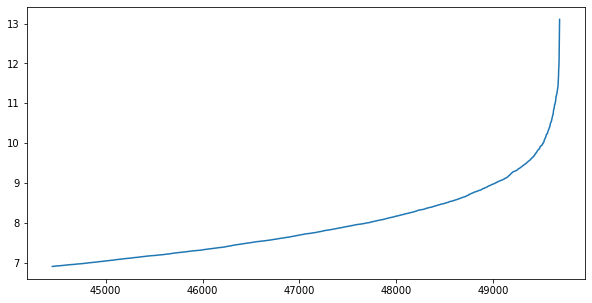

In [0]:
counts = customer_orders.groupby('product_id').size()
counts = counts.sort_values(axis=0, ascending=True)
minimum_occurrence = 1000
for index, count in enumerate(counts.values):
    if count > minimum_occurrence:
        break

print(len(counts) - index)
fig, ax = plt.subplots(figsiz ce=(10, 5))
ax.plot(np.arange(start=index, stop=len(counts), step=1), np.log(counts.values[index:]))

In [0]:
# Group by order id to create our basket
customer_orders = customer_orders[customer_orders['product_id'].isin(counts[index:])]
customer_orders['product_id'] = customer_orders['product_id'].astype(np.int32)
customer_orders = customer_orders.groupby(['order_id', 'user_id'])['product_id'].agg(lambda x: list(x)).reset_index(name='items')
customer_orders[customer_orders['items'].map(len) > 1]
customer_orders.to_pickle('customer_orders.pkl')

In [0]:
customer_orders.shape

(1220698, 3)

In [0]:
baskets = pd.read_pickle('customer_orders.pkl')

In [0]:
products[products['product_id'].isin(counts.tail(n=20).index)]

,product_id,product_name,aisle_id,department_id
5875,5876,Organic Lemon,24,4
8276,8277,Apple Honeycrisp Organic,24,4
13175,13176,Bag of Organic Bananas,24,4
16796,16797,Strawberries,24,4
21136,21137,Organic Strawberries,24,4
21902,21903,Organic Baby Spinach,123,4
22934,22935,Organic Yellow Onion,83,4
24851,24852,Banana,24,4
24963,24964,Organic Garlic,83,4
26208,26209,Limes,24,4


In [0]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(baskets['items']).transform(baskets['items'])
df = pd.DataFrame(te_ary, columns=te.columns_)
baskets = baskets.join(df)

In [0]:
baskets.to_pickle('baskets.pkl')

In [0]:
df2 = df.sum(axis = 0, skipna = True)

In [0]:
df2.drop('user_id', inplace=True)

In [0]:
df2.sort_values(axis=0, ascending=False)

13176    1
13032    1
dtype: int64